In [11]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import yaml
from sklearn.metrics import log_loss

Set all paths and parameters to a YAML configuration file in order to improve code quality

In [12]:
def load_config(config_path):
   with open(config_path, 'r') as stream:
    try:
        return yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
        
config = load_config('config.yaml')

# Define color palette for future plots
pal = sns.color_palette('bright')

#### Train data

In [13]:
df_train = pd.read_csv(config['files']['train_dataset'])
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780


Text(0, 0.5, 'Number of questions')

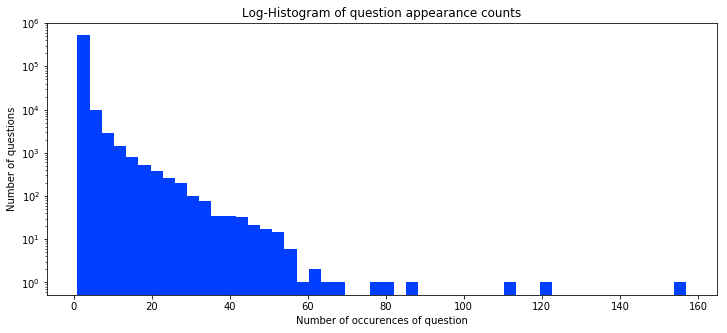

In [21]:
print('Total number of question pairs for training: {}'.format(len(df_train)))
print('Duplicate pairs: {}%'.format(round(df_train['is_duplicate'].mean()*100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50, color=pal[0])
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

#### Test data

In [15]:
df_test = pd.read_csv(config['files']['test_dataset'])
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


### Text Analysis
Made on the train dataset as test purpose is only for submision

**Character distribution**

mean-train 59.82 std-train 31.96 max-train 1169.00


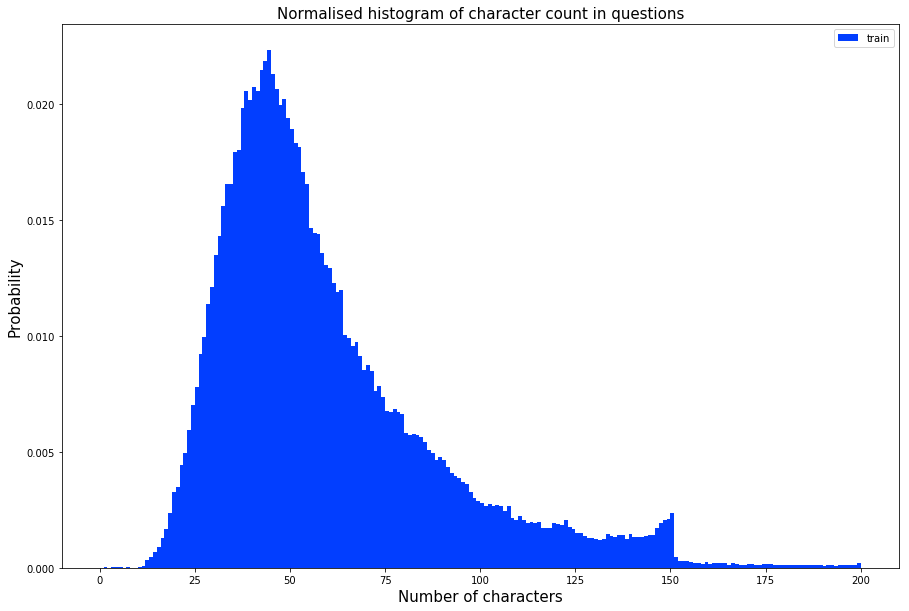

In [20]:
train_questions = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)

char_dist_train = train_questions.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(char_dist_train, bins=200, range=[0, 200], color=pal[0], density=True, label='train')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)
print('mean-train {:.2f} std-train {:.2f} max-train {:.2f}'.format(
    char_dist_train.mean(),char_dist_train.std(), char_dist_train.max()))

**Word distribution** 

mean-train 11.06 std-train 5.89 max-train 237.00


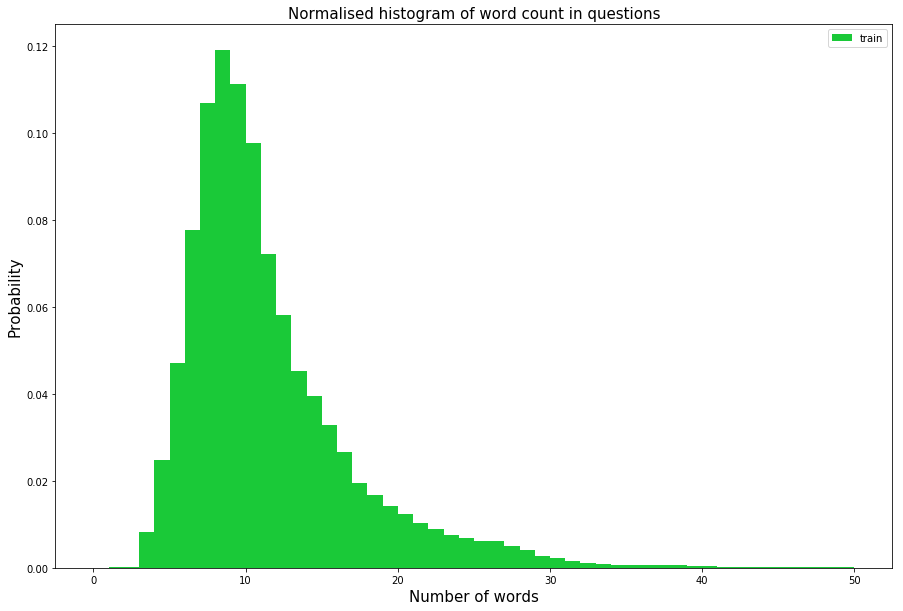

In [26]:
word_dist_train = train_questions.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(word_dist_train, bins=50, range=[0, 50], color=pal[2], density=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} max-train {:.2f}'.format(
    word_dist_train.mean(), word_dist_train.std(), word_dist_train.max()))

**Special symbol analysis**

Question marks, mathematical symbols, and other punctuation elements analysis

In [27]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

NameError: name 'train_qs' is not defined

### Feature Engineering